<a href="https://colab.research.google.com/github/fidamaisahana/MachineLearning/blob/main/Classification/Preparation_%26_Preprocessing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Baca file Excel dari Google Drive
import pandas as pd



Mounted at /content/drive


In [4]:
# Ganti 'path_to_your_file' dengan path lengkap file di Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/ForPrepocessing_DATA RUMAH.xlsx'


# Membaca file Excel
df = pd.read_excel(file_path)

# 3. Cek data yang diimpor
print(df.head())

                                          NAMA RUMAH       HARGA   LB   LT  \
0  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...  3800000000  220  220   
1  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...  4600000000  180  137   
2  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...  3000000000  267  250   
3           Rumah Baru Tebet, Tebet, Jakarta Selatan   430000000   40   25   
4  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...  9000000000  400  355   

   KT  KM  GRS  
0   3   3    0  
1   4   3    2  
2   4   4    4  
3   2   2    0  
4   6   5    3  


In [5]:
#Menampilkan Nama-nama header kolom
df.columns

Index(['NAMA RUMAH', 'HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS'], dtype='object')

In [6]:
#menghitung jumlah baris dan kolom pada dataset
num_rows, num_columns = df.shape
print(f"Jumlah baris: {num_rows}")
print(f"Jumlah kolom: {num_columns}")

Jumlah baris: 1011
Jumlah kolom: 7


In [7]:
#mancari data duplikat
df.drop_duplicates(keep='first',inplace=True)
df


,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...
1005,Rumah Strategis 100meter Ke Jl Supomo Di Mente...,2600000000,100,140,3,2,1
1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


Index(['NAMA RUMAH', 'HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS'], dtype='object')


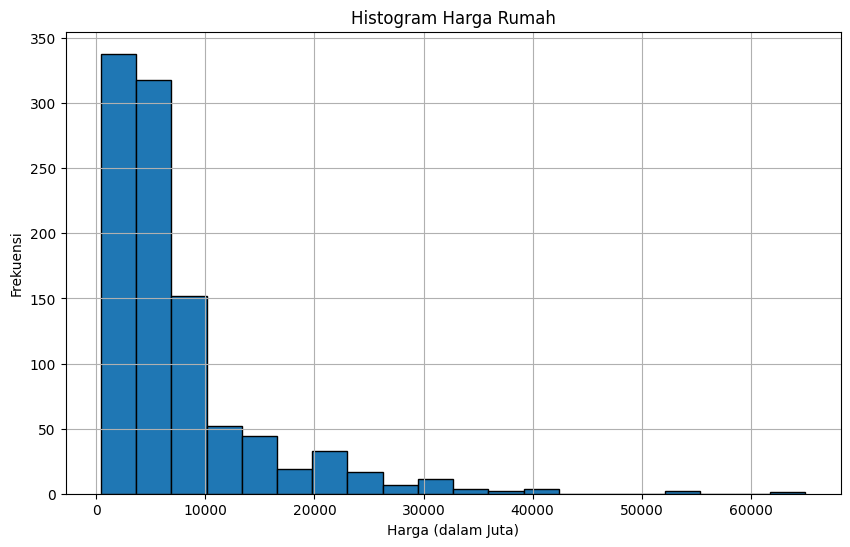

In [8]:
import matplotlib.pyplot as plt

# Periksa nama kolom yang sebenarnya di DataFrame kamu
print(df.columns)

# Pilih nama kolom yang benar untuk harga (dalam juta) dan perbarui kode
nama_kolom_harga = 'HARGA'  # Ganti 'HARGA' dengan nama kolom yang benar dari df.columns jika perlu

# Membuat histogram dengan harga dalam juta
plt.figure(figsize=(10, 6))
plt.hist(df[nama_kolom_harga] / 1000000, bins=20, edgecolor='black')  # Bagi dengan 1.000.000 untuk mengubah ke juta
plt.xlabel('Harga (dalam Juta)')  # Ubah label sumbu x
plt.ylabel('Frekuensi')
plt.title('Histogram Harga Rumah')
plt.grid(True)
plt.show()

In [9]:
# 5. Mengkonstruksi Data (misalnya, kita ingin menghitung harga per meter persegi)
# Check the actual column name and replace 'Harga' if necessary
df['Harga per m2'] = df['HARGA'] / df['LB']  # Sesuaikan nama kolom jika berbeda
print("\nData dengan kolom 'Harga per m2':")
print(df)

# 6. Menentukan Label Data (misalnya, mengklasifikasikan rumah berdasarkan harga menjadi 'Murah', 'Sedang', atau 'Mahal')
def klasifikasi_harga(harga):
    if harga < 3000000000:
        return 'Murah'
    elif 3000000000 <= harga < 6000000000:
        return 'Sedang'
    else:
        return 'Mahal'

# Ensure the column name is correct in the apply function
df['Kategori Harga'] = df['HARGA'].apply(klasifikasi_harga)
print("\nData dengan Kategori Harga:")
print(df)


Data dengan kolom 'Harga per m2':
                                             NAMA RUMAH        HARGA   LB  \
0     Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...   3800000000  220   
1     Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...   4600000000  180   
2     Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...   3000000000  267   
3              Rumah Baru Tebet, Tebet, Jakarta Selatan    430000000   40   
4     Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...   9000000000  400   
...                                                 ...          ...  ...   
1005  Rumah Strategis 100meter Ke Jl Supomo Di Mente...   2600000000  100   
1006  Rumah Strategis Akses Jalan 2mobil Di Menteng ...   9000000000  450   
1007             Tebet Rumah Siap Huni Jln 2 Mbl Nyaman   4000000000  160   
1009  Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...  19000000000  360   
1010                Dijual Rumah Kokoh Di Gudang Peluru  10500000000  420   

       LT  KT  KM  GRS  Harga per m2  
0